<a href="https://colab.research.google.com/github/VasavSrivastava/MAT421/blob/main/Hw2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**17.1 Interpolation Problem Statement**

Interpolation is the process of estimating unknown data values within the range of a discrete set of known data points. Given a dataset consisting of independent values, $x_i$, and their corresponding dependent values, $y_i$, for $i = 1, \dots, n$, interpolation involves finding a function $\hat{y}(x)$ such that $\hat{y}(x_i) = y_i$ for every point in the dataset. This function, $\hat{y}(x)$, is called an interpolation function. Using $\hat{y}(x)$, we can estimate the value of $y$ at a new point $x^*$ within the dataset's range. Unlike regression, interpolation does not assume an underlying model for the data but relies on the assumption that the data between known points behaves in a predictable, smooth manner.



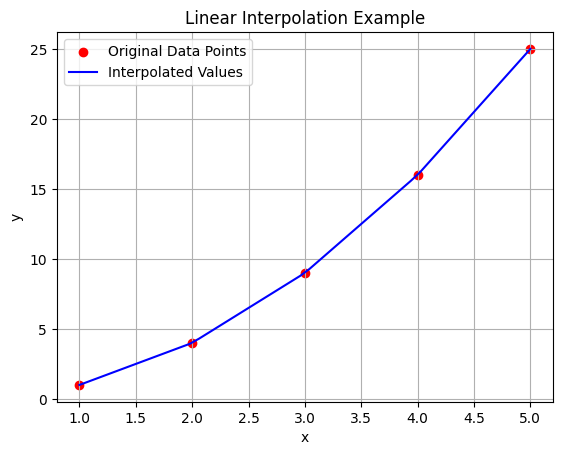

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points
x = np.array([1, 2, 3, 4, 5])  # Independent variable
y = np.array([1, 4, 9, 16, 25])  # Dependent variable (y = x^2)

# Create an interpolation function
interp_function = interp1d(x, y, kind='linear')  # Linear interpolation

# Interpolating new data points
x_new = np.linspace(1, 5, 50)  # Generate 50 points between 1 and 5
y_new = interp_function(x_new)

# Plot the original data points and the interpolated values
plt.scatter(x, y, color='red', label='Original Data Points')  # Known points
plt.plot(x_new, y_new, color='blue', label='Interpolated Values')  # Interpolation
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Interpolation Example')
plt.legend()
plt.grid()
plt.show()


#**17.2 Linear Interpolation**  
Linear interpolation is a method used to estimate the value of a function, $\hat{y}(x)$, at a given point $x$ within the range of two known data points, $(x_i, y_i)$ and $(x_{i+1}, y_{i+1})$. The assumption is that the function forms a straight line between these two points. The interpolated value is calculated using the formula:  
$$\hat{y}(x) = y_i + \frac{(y_{i+1} - y_i)(x - x_i)}{(x_{i+1} - x_i)}$$  
This method is simple and widely used in numerical computations to approximate unknown values within the range of known data.


Interpolated value at x = 1.5: 2.5


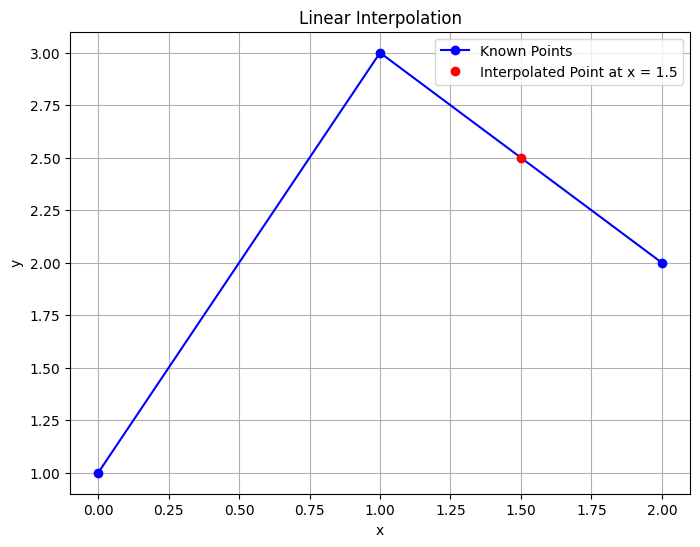

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

# Known data points
x = np.array([0, 1, 2])  # Independent variable
y = np.array([1, 3, 2])  # Dependent variable

# Linear interpolation function
f = interp1d(x, y, kind='linear')

# Interpolating at x = 1.5
x_new = 1.5
y_hat = f(x_new)
print(f"Interpolated value at x = {x_new}: {y_hat}")

# Plot the known points and the interpolated value
plt.figure(figsize=(8, 6))
plt.plot(x, y, '-ob', label='Known Points')  # Known data points
plt.plot(x_new, y_hat, 'ro', label=f'Interpolated Point at x = {x_new}')  # Interpolated point
plt.title('Linear Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()


#**17.3 Cubic Spline Interpolation**  
Cubic spline interpolation is a method used to estimate unknown values between known data points using piecewise cubic polynomials. For a dataset with $n$ points, $n-1$ cubic functions are constructed, each joining consecutive data points. These cubic functions, $S_i(x)$, are defined by $S_i(x) = a_i x^3 + b_i x^2 + c_i x + d_i$, and their coefficients are determined by solving a system of equations derived from continuity and smoothness conditions. Specifically, the constraints ensure that the splines pass through all given data points, have continuous first and second derivatives, and optionally meet endpoint conditions. This approach produces a smooth and accurate interpolation curve that avoids sharp corners or discontinuities between data points.


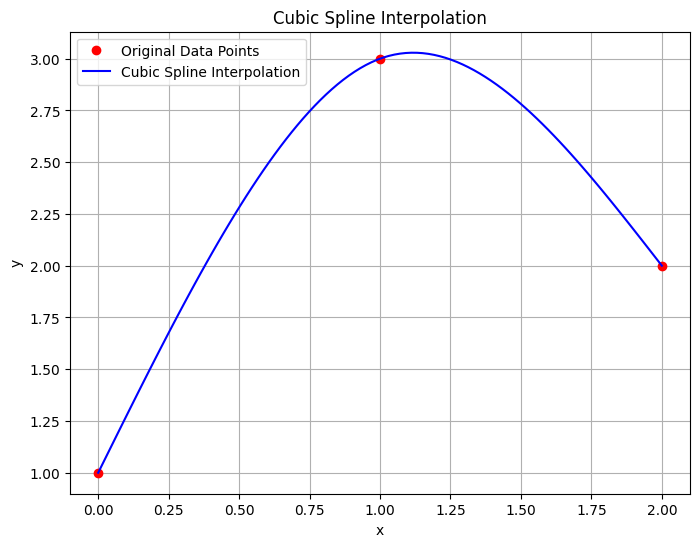

Cubic spline coefficients for interval 0: [-0.75  0.    2.75  1.  ]
Cubic spline coefficients for interval 1: [ 0.75 -2.25  0.5   3.  ]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Known data points
x = np.array([0, 1, 2])  # Independent variable
y = np.array([1, 3, 2])  # Dependent variable

# Create a cubic spline interpolation function with natural boundary conditions
cs = CubicSpline(x, y, bc_type='natural')

# Generate new data points for interpolation
x_new = np.linspace(0, 2, 100)  # 100 points between 0 and 2
y_new = cs(x_new)

# Plot the original points and the cubic spline interpolation
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'ro', label='Original Data Points')  # Original data points
plt.plot(x_new, y_new, 'b-', label='Cubic Spline Interpolation')  # Interpolation curve
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

# Display the coefficients of the cubic spline for each interval
for i in range(len(cs.c.T)):
    print(f"Cubic spline coefficients for interval {i}: {cs.c[:, i]}")
